In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Task 1

data = pd.read_csv("airlines.csv")
df = data.drop(columns = ['id'])

In [3]:
# Task 2

print(df.isna().sum())

balance              0
qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
bonus_miles          0
bonus_trans          0
flight_miles_12mo    0
flight_trans_12      0
days_since_enroll    0
award                0
dtype: int64


In [4]:
# Task 3

df.describe()

,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


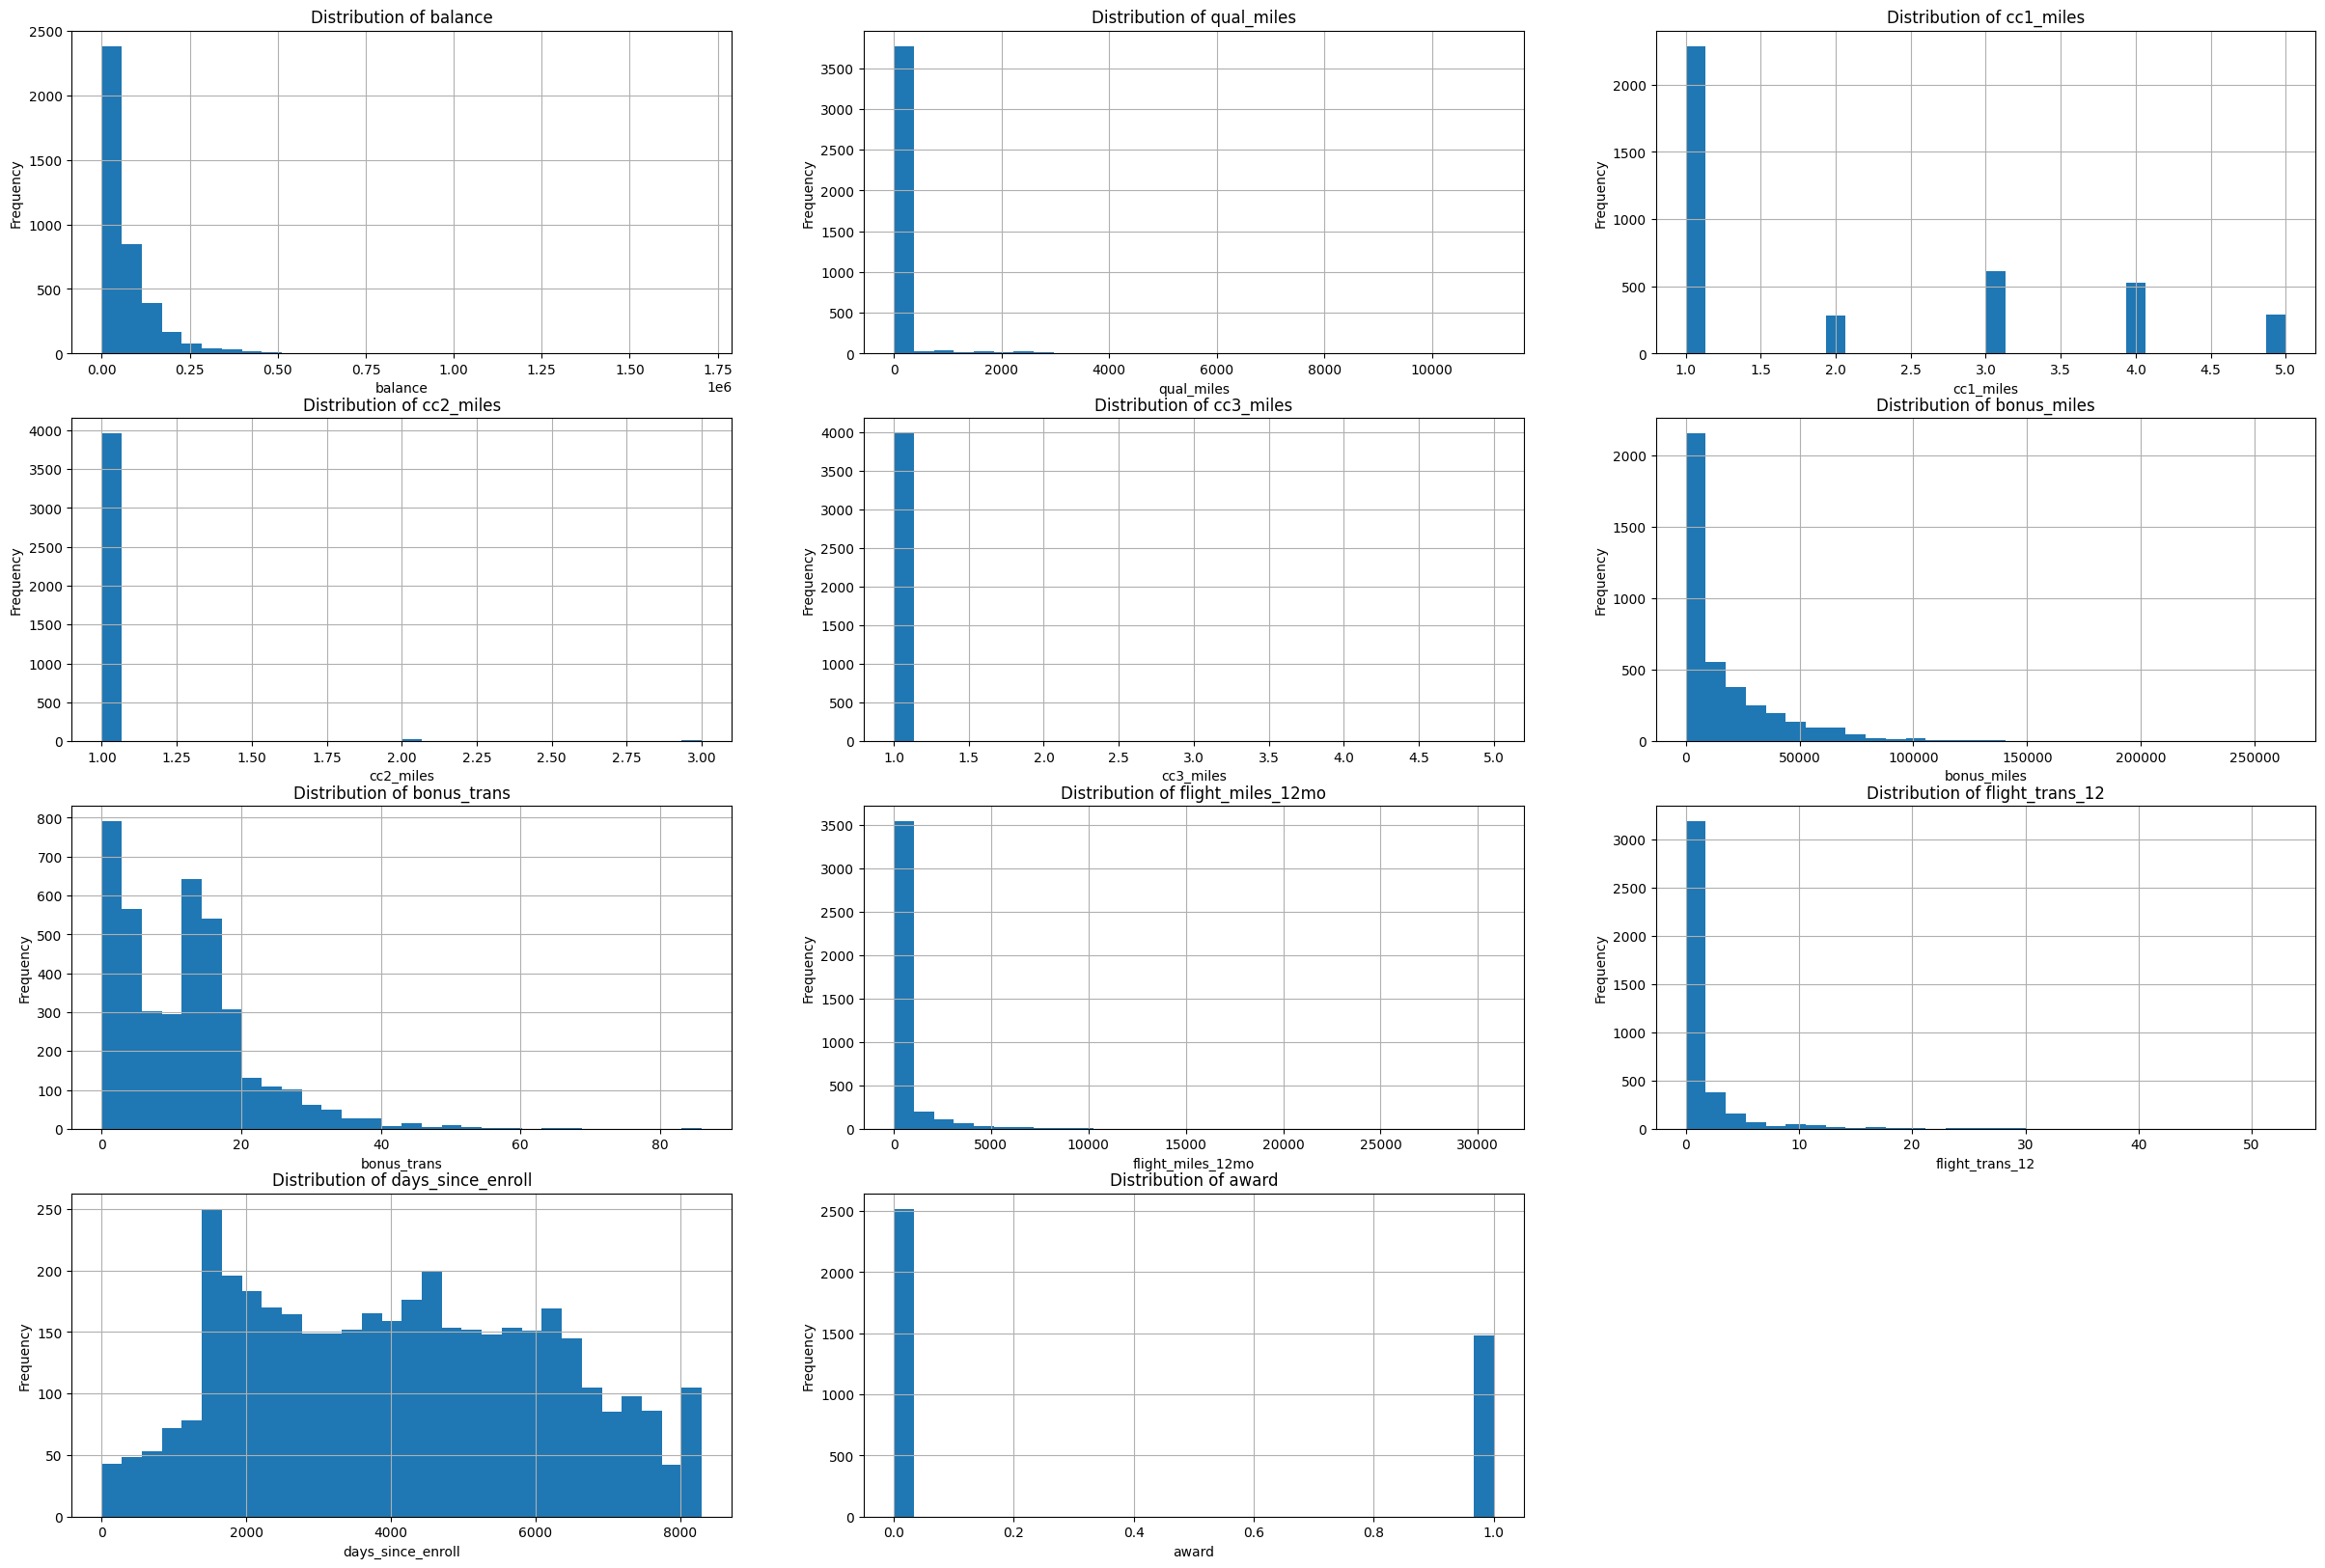

In [5]:
# Task 3

plt.figure(figsize=(30, 20))
for i, feature in enumerate(df.columns, 1):
  plt.subplot(4, 3, i)
  df[feature].hist(bins = 30)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')

plt.show()

In [6]:
# Task 4

percentage_of_having_award = df .iloc[:,-1].sum() / len(df)
print("Percentage of customers with award is " + str(percentage_of_having_award))
percentage_of_not_having_award = 1 - percentage_of_having_award
print("Percentage of customers without award is " + str(percentage_of_not_having_award))

Percentage of customers with award is 0.3703425856464116
Percentage of customers without award is 0.6296574143535885


In [7]:
# Task 5

corr = df.corr(method = "pearson")
print(corr["balance"])

balance              1.000000
qual_miles           0.108722
cc1_miles            0.338344
cc2_miles           -0.008804
cc3_miles            0.035243
bonus_miles          0.403487
bonus_trans          0.324935
flight_miles_12mo    0.217551
flight_trans_12      0.255700
days_since_enroll    0.263129
award                0.178494
Name: balance, dtype: float64


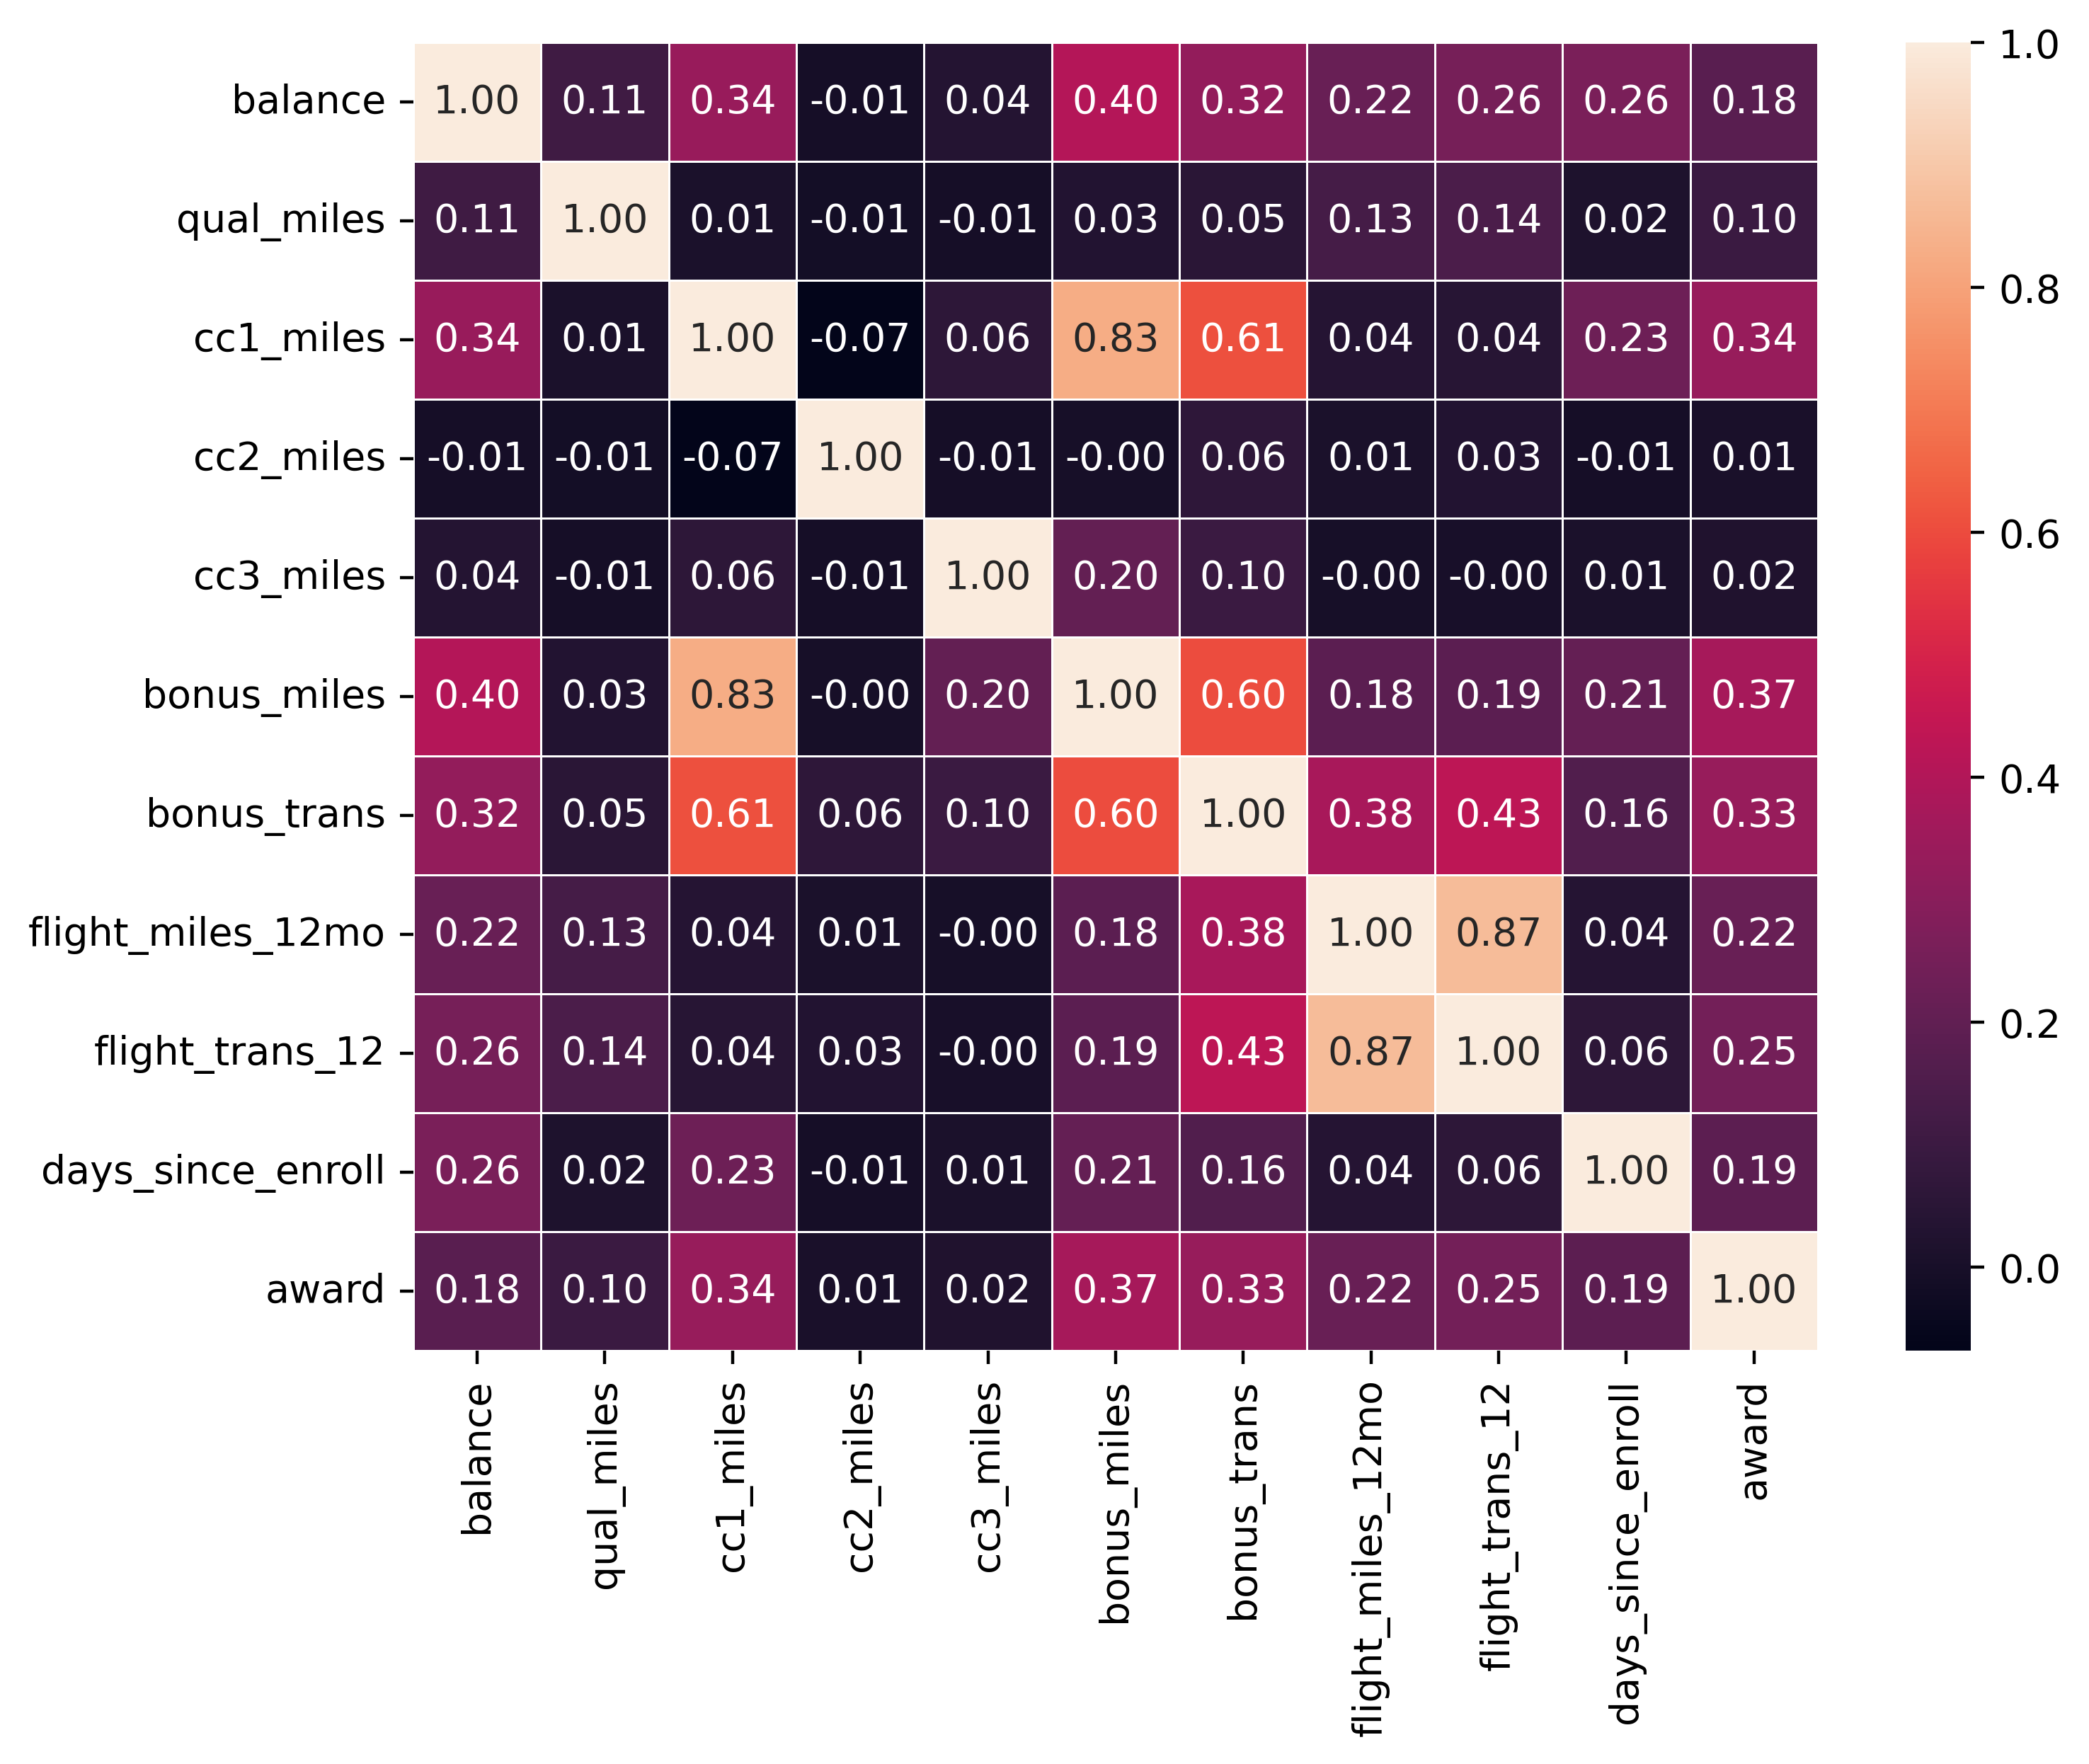

In [8]:
# Task 5

plt.figure(figsize=(8,6), dpi =400)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

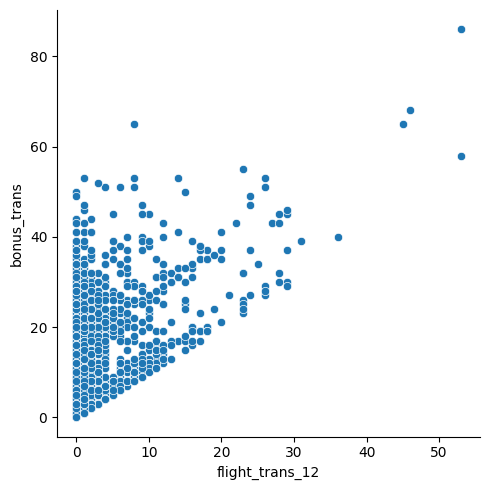

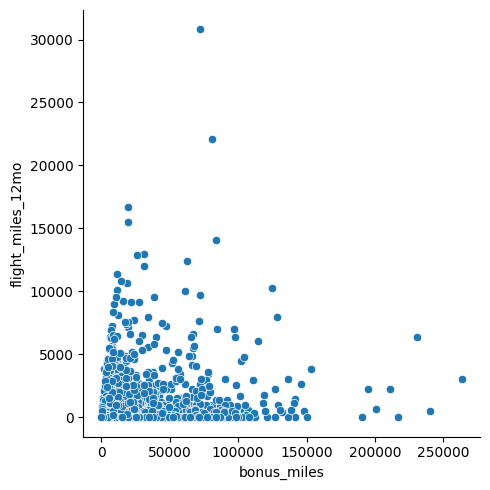

In [9]:
# Task 6

flying_bonus_transaction = df["flight_trans_12"]
non_flight_bonus_transaction = df["bonus_trans"]

sns.relplot(data = df , x = flying_bonus_transaction, y = non_flight_bonus_transaction)

flying_miles_bonus = df["bonus_miles"]
non_flight_miles_bonus = df["flight_miles_12mo"]
sns.relplot(data = df , x = flying_miles_bonus, y = non_flight_miles_bonus)


In [10]:
# Task 7

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

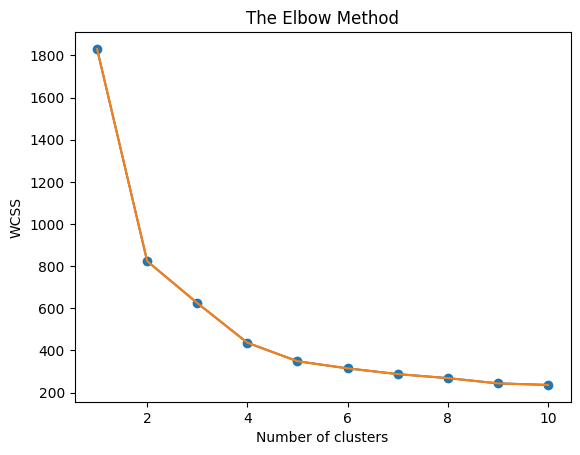

In [11]:
# Task 7

from sklearn.cluster import KMeans

sumOfSquareError = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df_scaled)
    sumOfSquareError.append(kmeans.inertia_)

plt.plot(range(1, 11), sumOfSquareError, marker='o')
plt.plot(range(1, 11), sumOfSquareError)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

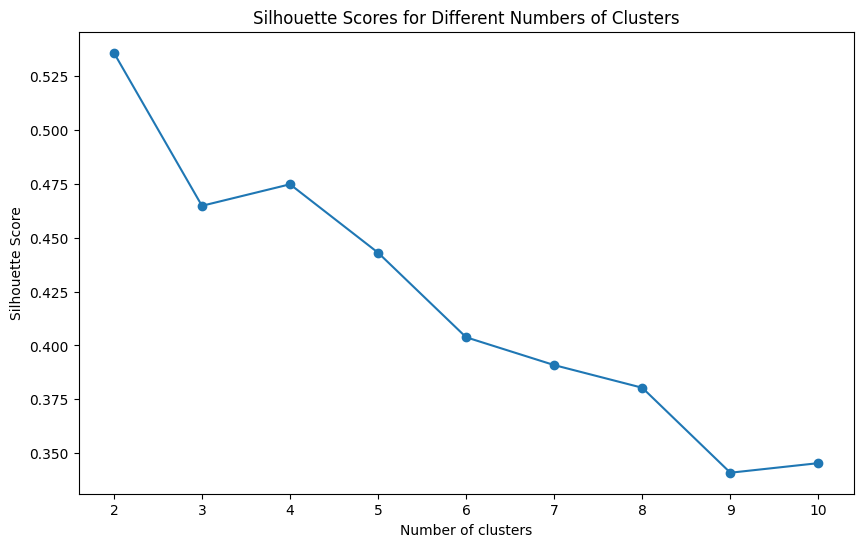

In [12]:
# Task 7

from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()